<a href="https://colab.research.google.com/github/ravikiraniitm17/my_git/blob/master/breast_cancer_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import sklearn

In [0]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

X = data.data
y = data.target

print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [0]:
print(X[0])
print(y[0:100])

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0]


In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(X)

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
h = model.fit(x_train, y_train, epochs = 100, batch_size = 50, validation_data = (x_test, y_test))

Train on 398 samples, validate on 171 samples
Epoch 1/100
398/398 [==============================] - 0s 808us/step - loss: 1.0825 - accuracy: 0.3869 - val_loss: 0.9724 - val_accuracy: 0.3509
Epoch 2/100
398/398 [==============================] - 0s 43us/step - loss: 0.8334 - accuracy: 0.3995 - val_loss: 0.8157 - val_accuracy: 0.3684
Epoch 3/100
398/398 [==============================] - 0s 46us/step - loss: 0.6942 - accuracy: 0.4648 - val_loss: 0.7088 - val_accuracy: 0.4561
Epoch 4/100
398/398 [==============================] - 0s 45us/step - loss: 0.5987 - accuracy: 0.5804 - val_loss: 0.6302 - val_accuracy: 0.6550
Epoch 5/100
398/398 [==============================] - 0s 44us/step - loss: 0.5292 - accuracy: 0.7487 - val_loss: 0.5699 - val_accuracy: 0.7544
Epoch 6/100
398/398 [==============================] - 0s 48us/step - loss: 0.4751 - accuracy: 0.8442 - val_loss: 0.5211 - val_accuracy: 0.7895
Epoch 7/100
398/398 [==============================] - 0s 51us/step - loss: 0.4292 - accu

In [0]:
predictions = model.predict(x_test)

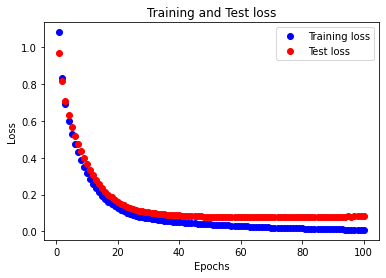

In [0]:
# plotting loss

import matplotlib.pyplot as plt


history_dict =  h.history

train_loss = history_dict['loss']
test_loss = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy'])+1)

plt.plot(epochs, train_loss, 'bo', label = 'Training loss')
plt.plot(epochs, test_loss, 'ro', label = 'Test loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

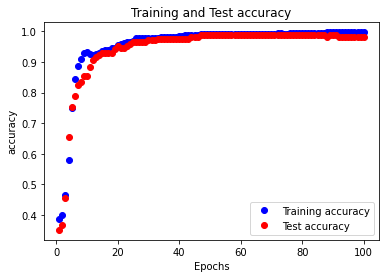

In [0]:
# plotting accuracy

history_dict =  h.history

train_loss = history_dict['accuracy']
test_loss = history_dict['val_accuracy']

epochs = range(1, len(history_dict['accuracy'])+1)

plt.plot(epochs, train_loss, 'bo', label = 'Training accuracy')
plt.plot(epochs, test_loss, 'ro', label = 'Test accuracy')
plt.title('Training and Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()